In [1]:
import sys,os,glob,copy
sys.path.append('../')
import numpy as np
from numpy.linalg import norm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator,interp2d
import matplotlib as mpl
from matplotlib.colors import LogNorm
from IPython.display import display, Markdown
from collections import OrderedDict
import pylhe
import glob
import pyslha

delphesDir = os.path.abspath("/home/camila/MG5/Delphes")
os.environ['ROOT_INCLUDE_PATH'] = os.path.join(delphesDir,"external")

import ROOT
import xml.etree.ElementTree as ET


ROOT.gSystem.Load(os.path.join(delphesDir,"libDelphes.so"))

ROOT.gInterpreter.Declare('#include "classes/SortableObject.h"')
ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps.get_cmap('RdYlBu')

Welcome to JupyROOT 6.26/10


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Obtain efficiencies

In [3]:
pclFiles = {'$\\Gamma=0.01$': '/home/camila/MonoXSMS/Tests/DMSimp_axial_0j_gm_001/Events/run_01/axial_3000_1_cms_exo_20_004.pcl',
            '$\\Gamma=0.05$': '/home/camila/MonoXSMS/Tests/DMSimp_axial_0j_gm_005/Events/run_01/axial_3000_1_cms_exo_20_004.pcl'}

In [4]:
df = [pd.read_pickle(f) for l, f in pclFiles.items()]

for i, label in enumerate(pclFiles.keys()):
    df[i]['filename'] = label
    
recastData = pd.DataFrame()
for d in df:
    recastData = pd.concat((recastData,d))

In [5]:
recastData.T

,0,1,2,0,1,2
Data-takingperiod,2016,2017,2018,2016,2017,2018
Luminosity (1/fb),36.0,41.5,59.7,36.0,41.5,59.7
bin_250.0_280.0,0.271389,0.301464,0.343424,15.52217,17.138901,21.758597
bin_250.0_280.0_ErrorPlus,0.014045,0.01508,0.015878,0.904534,0.933863,1.066547
bin_250.0_280.0_ErrorMinus,0.014045,0.01508,0.015878,0.904534,0.933863,1.066547
bin_280.0_310.0,0.187913,0.250654,0.276294,12.599447,15.350867,17.220246
bin_280.0_310.0_ErrorPlus,0.011196,0.012957,0.013228,0.769594,0.834963,0.890785
bin_280.0_310.0_ErrorMinus,0.011196,0.012957,0.013228,0.769594,0.834963,0.890785
bin_310.0_340.0,0.154967,0.178988,0.213452,8.635028,9.935824,12.729835
bin_310.0_340.0_ErrorPlus,0.008694,0.009791,0.010323,0.507095,0.569667,0.646613


In [6]:
paramFilter = {
    'Mode' : 'DM+QCDjets',
    '$m_{med}$' : 3000.,
    '$m_{DM}$' : 1.,
    'Data-takingperiod' : 2017
}

textstr = '\n'.join([r'%s = %s' %(k,v) for k,v in paramFilter.items()])
dfModel = recastData.loc[(recastData[list(paramFilter)] == pd.Series(paramFilter)).all(axis=1)]

In [7]:
dfModel.T

,1,1
Data-takingperiod,2017,2017
Luminosity (1/fb),41.5,41.5
bin_250.0_280.0,0.301464,17.138901
bin_250.0_280.0_ErrorPlus,0.01508,0.933863
bin_250.0_280.0_ErrorMinus,0.01508,0.933863
bin_280.0_310.0,0.250654,15.350867
bin_280.0_310.0_ErrorPlus,0.012957,0.834963
bin_280.0_310.0_ErrorMinus,0.012957,0.834963
bin_310.0_340.0,0.178988,9.935824
bin_310.0_340.0_ErrorPlus,0.009791,0.569667


In [8]:
0.316282/(0.000495*1e3*41.5)

0.01539647073141049

In [9]:
18.821994/(0.036275*1e3*41.5)

0.012502881436151221

In [10]:
def getBins(dfModel,rightBin = 1400.):
    
    bins = {c : eval(c.split('_')[1]) for c in dfModel.columns if ("bin_" in c and not 'Error' in c)}
    binsError = {c : eval(c.split('_')[1]) for c in dfModel.columns if ("bin_" in c and 'ErrorPlus' in c)}    
    binCenter = (np.array(list(bins.values()))+np.diff(list(bins.values())+[rightBin])/2).tolist()    
    binLeft = [bins[c] for c in bins]+[rightBin] 
    
    return bins,binsError,binCenter,binLeft


def getEfficiencies(dfSingle, bins, binsError):
    
    xsec = dfSingle['Total xsec (pb)'].iloc[0]
    lumi = dfSingle['Luminosity (1/fb)'].iloc[0]
    eff = {}
    ns = {c: dfSingle[c].iloc[0] for c in bins}
    nsErr = {c : dfSingle[c].iloc[0] for c in binsError}
    effErr = {}
    for c in bins:
        if ns[c] == 0:
            eff[c] = 0
            effErr[f'{c}_Error'] = 0
        else:
            eff[c] = dfSingle[c].iloc[0]/(xsec*1e3*lumi)
            effErr[f'{c}_Error'] = nsErr[f'{c}_ErrorPlus']*eff[c]/ns[c]
    
    return eff, effErr

In [11]:
bins, binsError, binCenter, binLeft = getBins(dfModel)

In [12]:
cols = []
for c in dfModel['filename']:
    cols.append(c)

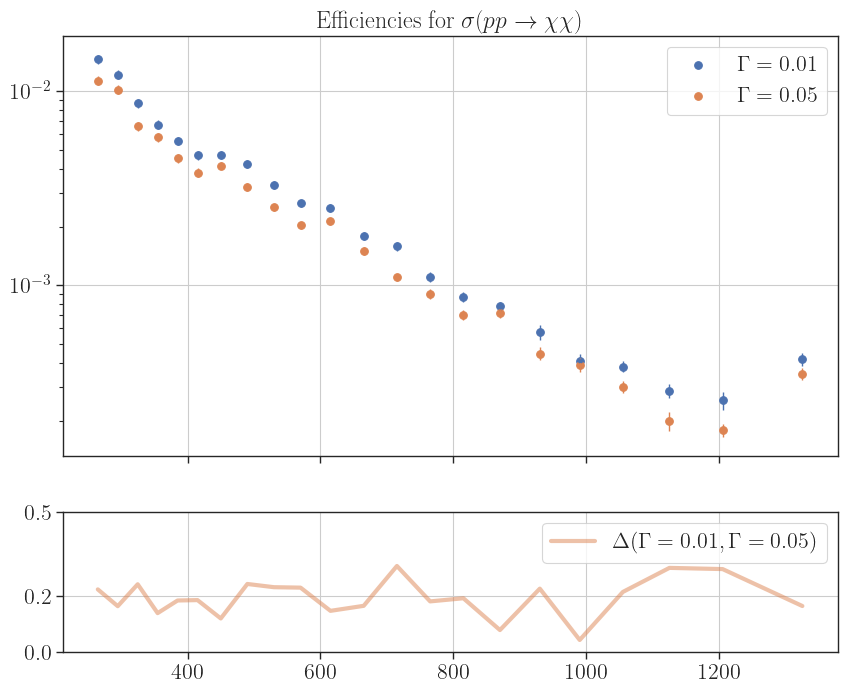

In [13]:
figs, ax = plt.subplots(2,sharex=True,figsize=(10,8), gridspec_kw = {'height_ratios':[3, 1]})

data = pd.DataFrame(columns=cols)
dataError = pd.DataFrame(columns=cols)
colors = {label : sns.color_palette('deep')[i] for i,label in enumerate(data.keys())}

for label in dfModel['filename']:
    dfSingle = dfModel[dfModel['filename'] == label]
    data[label], dataError[label] = getEfficiencies(dfSingle, bins, binsError)
 
    eff = np.array([data[label][c] for c in bins])
    effErr = np.array([dataError[label][f'{c}_Error'] for c in bins])
    
    ax[0].scatter(x=binCenter, y=eff, s=30, color=colors[label], label=label)
    ax[0].errorbar(binCenter, eff, yerr=effErr, marker='.', 
                   elinewidth=1.0, drawstyle='steps-mid',linewidth=0.0, color=colors[label])
    ax[0].legend()
    

label1 = r'$\Delta(\Gamma=0.01, \Gamma=0.05)$'
label2 = r'$\Delta \epsilon / \sigma_{\epsilon}$'
    
diff1 = np.abs(data['$\\Gamma=0.01$'] - data['$\\Gamma=0.05$'])
relDiff1 = diff1/data['$\\Gamma=0.01$']
relDiff1 = relDiff1.replace(np.nan, 0)

# diffError1 = np.array(diff1)/np.sqrt(dataError['$\\Gamma=0.01$']**2 + dataError['$\\Gamma=0.05$']**2)
# diffError1 = diffError1.replace(np.nan, 0)

ax[1].plot(binCenter, relDiff1, color=colors[label], linewidth=3., label=label1, alpha=.5)
# ax[1].plot(binCenter, diffError1, color=colors[label], linewidth=3., linestyle='--', 
#            label=label2)


for a in ax:
    a.legend()
    a.grid(True)
    a.set_yticks([0., 0.2, 0.5])

ax[0].set_title(r'Efficiencies for $\sigma(p p \to \chi \chi)$')
ax[0].set_yscale('log')
plt.show()
    

In [118]:
pclFiles = {'off-shell': '/home/camila/MonoXSMS/Tests/DMSimp_axial_0j_gm_005/Events/run_07/axial_1750_1_cms_exo_20_004.pcl',
            'on-shell': '/home/camila/MonoXSMS/Tests/DMSimp_axial_0j_gm_onshell_005/Events/run_07/axial_1750_1_cms_exo_20_004.pcl'}

In [119]:
df = [pd.read_pickle(f) for l, f in pclFiles.items()]

for i, label in enumerate(pclFiles.keys()):
    df[i]['filename'] = label
    
recastData = pd.DataFrame()
for d in df:
    recastData = pd.concat((recastData,d))

In [120]:
paramFilter = {
    'Mode' : 'DM+QCDjets',
    '$m_{med}$' : 1750.,
    '$m_{DM}$' : 1.,
    'Data-takingperiod' : 2017
}

textstr = '\n'.join([r'%s = %s' %(k,v) for k,v in paramFilter.items()])
dfModel = recastData.loc[(recastData[list(paramFilter)] == pd.Series(paramFilter)).all(axis=1)]

In [121]:
bins, binsError, binCenter, binLeft = getBins(dfModel)

In [122]:
cols = []
for c in dfModel['filename']:
    cols.append(c)

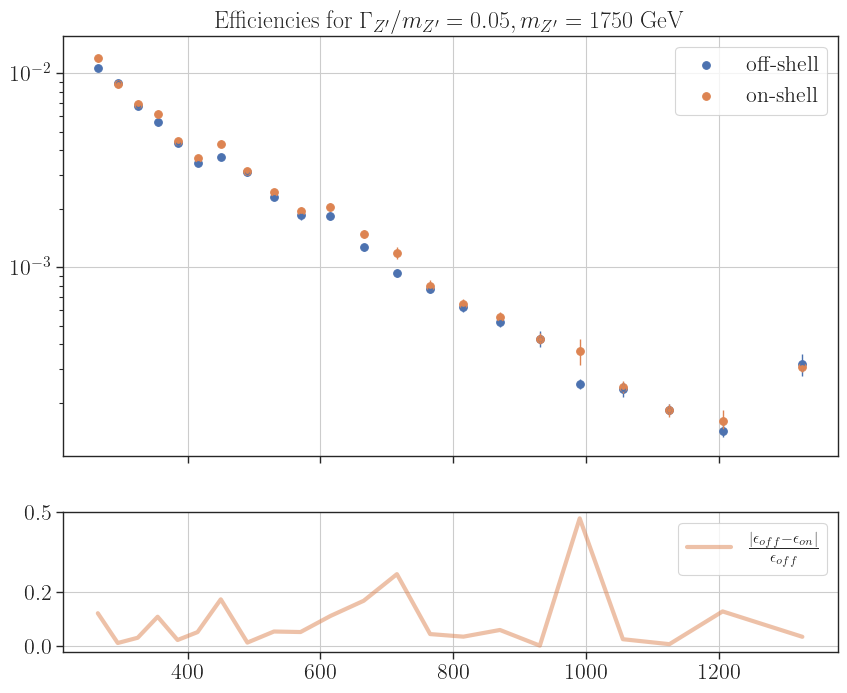

In [123]:
figs, ax = plt.subplots(2,sharex=True,figsize=(10,8), gridspec_kw = {'height_ratios':[3, 1]})

data = pd.DataFrame(columns=cols)
dataError = pd.DataFrame(columns=cols)
colors = {label : sns.color_palette('deep')[i] for i,label in enumerate(data.keys())}

for label in dfModel['filename']:
    dfSingle = dfModel[dfModel['filename'] == label]
    data[label], dataError[label] = getEfficiencies(dfSingle, bins, binsError)
 
    eff = np.array([data[label][c] for c in bins])
    effErr = np.array([dataError[label][f'{c}_Error'] for c in bins])
    
    ax[0].scatter(x=binCenter, y=eff, s=30, color=colors[label], label=label)
    ax[0].errorbar(binCenter, eff, yerr=effErr, marker='.', 
                   elinewidth=1.0, drawstyle='steps-mid',linewidth=0.0, color=colors[label])
    ax[0].legend()
    

label1 = r'$\frac{|\epsilon_{off} - \epsilon_{on}|}{\epsilon_{off}}$'
label2 = r'$\Delta \epsilon / \sigma_{\epsilon}$'
    
diff1 = np.abs(data['off-shell'] - data['on-shell'])
relDiff1 = diff1/data['off-shell']
relDiff1 = relDiff1.replace(np.nan, 0)

# diffError1 = np.array(diff1)/np.sqrt(dataError['$\\Gamma=0.01$']**2 + dataError['$\\Gamma=0.05$']**2)
# diffError1 = diffError1.replace(np.nan, 0)

ax[1].plot(binCenter, relDiff1, color=colors[label], linewidth=3., label=label1, alpha=.5)
# ax[1].plot(binCenter, diffError1, color=colors[label], linewidth=3., linestyle='--', 
#            label=label2)


for a in ax:
    a.legend()
    a.grid(True)
    a.set_yticks([0., 0.2, 0.5])

ax[0].set_title(r'Efficiencies for $\Gamma_{Z^{\prime}} / m_{Z^{\prime}} = 0.05, m_{Z^{\prime}} = %1.0f$ GeV' 
                %(float(np.array(dfModel['$m_{med}$'])[0])))
ax[0].set_yscale('log')

# plt.savefig('../../figures/efficiencies_my1_1750.png')
plt.show()
    

In [38]:
np.array(dfModel['$m_{med}$'])[0]

3000.0

In [21]:
pclFiles = {'off-shell': '/home/camila/MonoXSMS/Tests/DMSimp_axial_0j_gm_001/Events/run_01/axial_3000_1_cms_exo_20_004.pcl',
            'on-shell': '/home/camila/MonoXSMS/Tests/DMSimp_axial_0j_gm_onshell_001/Events/run_01/axial_3000_1_cms_exo_20_004.pcl'}

In [22]:
df = [pd.read_pickle(f) for l, f in pclFiles.items()]

for i, label in enumerate(pclFiles.keys()):
    df[i]['filename'] = label
    
recastData = pd.DataFrame()
for d in df:
    recastData = pd.concat((recastData,d))

In [23]:
recastData.T

,0,1,2,0,1,2
Data-takingperiod,2016,2017,2018,2016,2017,2018
Luminosity (1/fb),36.0,41.5,59.7,36.0,41.5,59.7
bin_250.0_280.0,0.271389,0.301464,0.343424,0.250549,0.271735,0.328522
bin_250.0_280.0_ErrorPlus,0.014045,0.01508,0.015878,0.012796,0.013346,0.014665
bin_250.0_280.0_ErrorMinus,0.014045,0.01508,0.015878,0.012796,0.013346,0.014665
bin_280.0_310.0,0.187913,0.250654,0.276294,0.177347,0.220049,0.242119
bin_280.0_310.0_ErrorPlus,0.011196,0.012957,0.013228,0.010124,0.011462,0.011787
bin_280.0_310.0_ErrorMinus,0.011196,0.012957,0.013228,0.010124,0.011462,0.011787
bin_310.0_340.0,0.154967,0.178988,0.213452,0.138967,0.158554,0.181436
bin_310.0_340.0_ErrorPlus,0.008694,0.009791,0.010323,0.007691,0.008277,0.009429


In [24]:
paramFilter = {
    'Mode' : 'DM+QCDjets',
    '$m_{med}$' : 3000.,
    '$m_{DM}$' : 1.,
    'Data-takingperiod' : 2017
}

textstr = '\n'.join([r'%s = %s' %(k,v) for k,v in paramFilter.items()])
dfModel = recastData.loc[(recastData[list(paramFilter)] == pd.Series(paramFilter)).all(axis=1)]

In [25]:
bins, binsError, binCenter, binLeft = getBins(dfModel)

In [26]:
cols = []
for c in dfModel['filename']:
    cols.append(c)

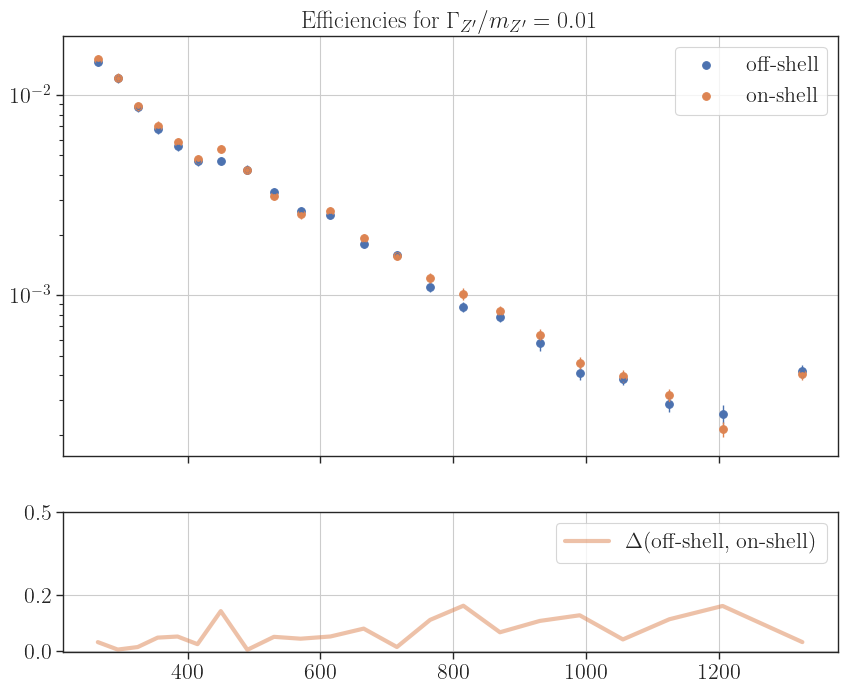

In [27]:
figs, ax = plt.subplots(2,sharex=True,figsize=(10,8), gridspec_kw = {'height_ratios':[3, 1]})

data = pd.DataFrame(columns=cols)
dataError = pd.DataFrame(columns=cols)
colors = {label : sns.color_palette('deep')[i] for i,label in enumerate(data.keys())}

for label in dfModel['filename']:
    dfSingle = dfModel[dfModel['filename'] == label]
    data[label], dataError[label] = getEfficiencies(dfSingle, bins, binsError)
 
    eff = np.array([data[label][c] for c in bins])
    effErr = np.array([dataError[label][f'{c}_Error'] for c in bins])
    
    ax[0].scatter(x=binCenter, y=eff, s=30, color=colors[label], label=label)
    ax[0].errorbar(binCenter, eff, yerr=effErr, marker='.', 
                   elinewidth=1.0, drawstyle='steps-mid',linewidth=0.0, color=colors[label])
    ax[0].legend()
    

label1 = r'$\Delta$(off-shell, on-shell)'
label2 = r'$\Delta \epsilon / \sigma_{\epsilon}$'
    
diff1 = np.abs(data['off-shell'] - data['on-shell'])
relDiff1 = diff1/data['off-shell']
relDiff1 = relDiff1.replace(np.nan, 0)

# diffError1 = np.array(diff1)/np.sqrt(dataError['$\\Gamma=0.01$']**2 + dataError['$\\Gamma=0.05$']**2)
# diffError1 = diffError1.replace(np.nan, 0)

ax[1].plot(binCenter, relDiff1, color=colors[label], linewidth=3., label=label1, alpha=.5)
# ax[1].plot(binCenter, diffError1, color=colors[label], linewidth=3., linestyle='--', 
#            label=label2)


for a in ax:
    a.legend()
    a.grid(True)
    a.set_yticks([0., 0.2, 0.5])

ax[0].set_title(r'Efficiencies for $\Gamma_{Z^{\prime}} / m_{Z^{\prime}} = 0.01$')
ax[0].set_yscale('log')
plt.show()
    